In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score , accuracy_score,recall_score,precision_score , roc_auc_score, roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# load Data

In [2]:
df = pd.read_csv('..\\data\\heart_disease.csv')
df.head()

,PC1,PC5,PC6,PC10,PC7,PC9,PC12,PC13,PC8,num
0,-0.017550,0.292001,0.746005,-0.343690,-0.727584,0.184558,0.350511,0.598685,-0.910318,0
1,-1.134815,0.174615,0.095826,0.239566,0.764537,-0.343816,-0.552569,-0.677350,-0.511039,1
2,-1.865945,0.059297,-0.125068,0.854383,-0.099045,-0.041109,0.011509,0.022689,-0.030261,1
3,0.897661,0.388291,0.411199,0.125395,0.406543,-0.521288,-0.390647,-0.211833,-0.039662,0
4,1.314315,0.308332,-0.268851,0.029966,-0.274715,0.800398,-0.180443,0.074683,0.190862,0


In [3]:
y= df['num']
x= df.drop('num',axis=1)

#  Split the dataset into training (80%) and testing (20%) sets.

In [4]:
X_train , X_test , y_train , y_test =train_test_split(x,y, test_size=0.2,random_state=42)

# Logistic Regression

In [5]:
lod_model =LogisticRegression(max_iter=1000, random_state=42)
lod_model.fit(X_train,y_train)

y_pred_log =lod_model.predict(X_test)
y_prop_log = lod_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred_log,)
print(f"precision: {precision * 100:.2f}%")

Recall = recall_score(y_test, y_pred_log,)
print(f"Recall: {Recall * 100:.2f}%")

F1_score = f1_score(y_test, y_pred_log,)
print(f"F1-score : {F1_score  * 100:.2f}%")

AUC = roc_auc_score(y_test, y_prop_log)
print(f"AUC: {AUC * 100:.2f}%")


Accuracy: 88.33%
precision: 86.96%
Recall: 83.33%
F1-score : 85.11%
AUC: 95.49%


In [6]:
# Save metrics
with open('../results/evaluation_metrics.txt', 'w') as f:
        f.write(f"""Logistic Regression:
        Accuracy : {accuracy* 100:.2f}%,
        Precision: {precision* 100:.2f}%,
        Recall: {Recall* 100:.2f}%,
        F1-Score: {F1_score* 100:.2f}%,
        AUC: {AUC* 100:.2f}%
    


""")

print("Evaluation metrics saved to '../results/evaluation_metrics.txt'")

Evaluation metrics saved to '../results/evaluation_metrics.txt'


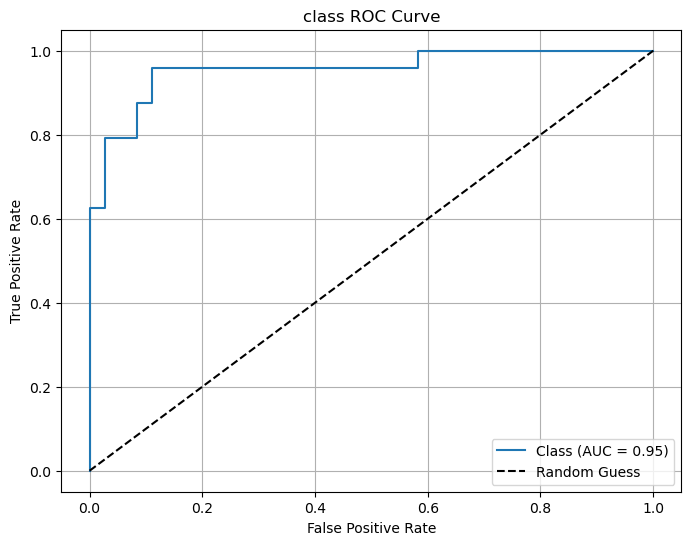

In [7]:
plt.figure(figsize=(8, 6))

fpr, tpr, _ = roc_curve(y_test, y_prop_log)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Class (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("class ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Decision Tree 

In [8]:
Dec_model =DecisionTreeClassifier(random_state=42)
Dec_model.fit(X_train,y_train)

y_pred_dec =Dec_model.predict(X_test)
y_prop_dec = Dec_model.predict_proba(X_test)[:, 1]

accuracy_DEC = accuracy_score(y_test, y_pred_dec)
print(f"Accuracy: {accuracy_DEC * 100:.2f}%")

precision_DEC= precision_score(y_test, y_pred_dec)
print(f"precision: {precision_DEC * 100:.2f}%")

Recall_DEC = recall_score(y_test, y_pred_dec)
print(f"Recall: {Recall_DEC * 100:.2f}%")

F1_score_DEC = f1_score(y_test, y_pred_dec)
print(f"F1-score : {F1_score_DEC  * 100:.2f}%")

AUC_DEC = roc_auc_score(y_test, y_prop_dec)
print(f"AUC: {AUC_DEC * 100:.2f}%")


Accuracy: 73.33%
precision: 65.38%
Recall: 70.83%
F1-score : 68.00%
AUC: 72.92%


In [9]:
# Save metrics
with open('../results/evaluation_metrics.txt', 'a') as f:
        f.write(f""" Decision Tree :
        Accuracy : {accuracy_DEC* 100:.2f}%,
        Precision: {precision_DEC* 100:.2f}%,
        Recall: {Recall_DEC* 100:.2f}%,
        F1-Score: {F1_score_DEC* 100:.2f}%,
        AUC: {AUC_DEC* 100:.2f}%
    


""")

print("Evaluation metrics saved to '../results/evaluation_metrics.txt'")

Evaluation metrics saved to '../results/evaluation_metrics.txt'


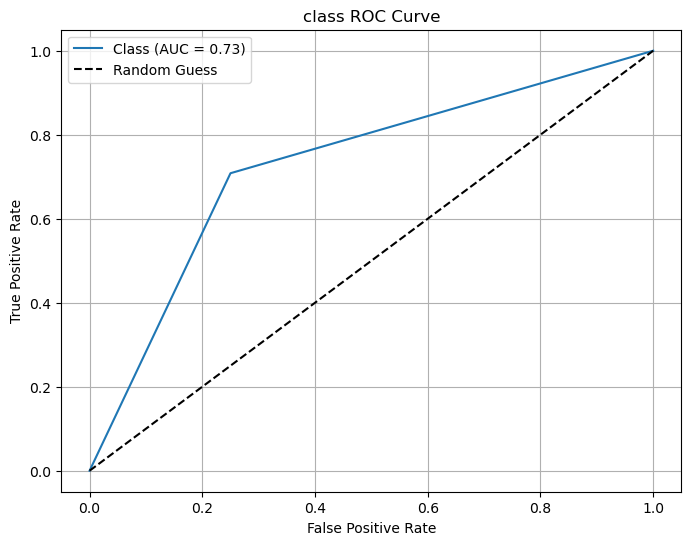

In [10]:

plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prop_dec)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Class (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("class ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Random Forest 

In [11]:
RF_model =RandomForestClassifier(random_state=42)
RF_model.fit(X_train,y_train)

y_pred_RF =RF_model.predict(X_test)
y_prop_RF = RF_model.predict_proba(X_test)[:,1]

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy_RF * 100:.2f}%")

precision_RF= precision_score(y_test, y_pred_RF)
print(f"precision: {precision_RF * 100:.2f}%")

Recall_RF = recall_score(y_test, y_pred_RF)
print(f"Recall: {Recall_RF * 100:.2f}%")

F1_score_RF = f1_score(y_test, y_pred_RF)
print(f"F1-score : {F1_score_RF  * 100:.2f}%")

AUC_RF = roc_auc_score(y_test, y_prop_RF)
print(f"AUC: {AUC_RF * 100:.2f}%")


Accuracy: 85.00%
precision: 80.00%
Recall: 83.33%
F1-score : 81.63%
AUC: 94.68%


In [12]:
# Save metrics
with open('../results/evaluation_metrics.txt', 'a') as f:
        f.write(f""" Random Forest  :
        Accuracy : {accuracy_RF* 100:.2f}%,
        Precision: {precision_RF* 100:.2f}%,
        Recall: {Recall_RF* 100:.2f}%,
        F1-Score: {F1_score_RF* 100:.2f}%,
        AUC: {AUC_RF* 100:.2f}%
    


""")

print("Evaluation metrics saved to '../results/evaluation_metrics.txt'")

Evaluation metrics saved to '../results/evaluation_metrics.txt'


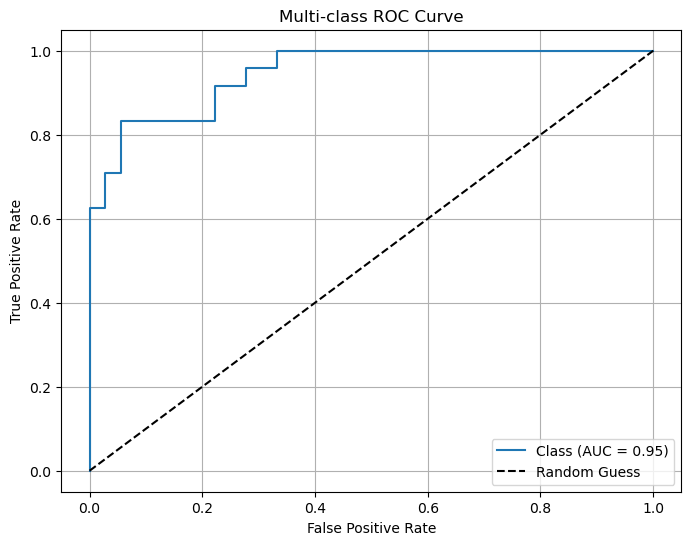

In [13]:
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prop_RF)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Class (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Support Vector Machine (SVM)

In [14]:
SVC_model =SVC(probability=True,random_state=42)
SVC_model.fit(X_train,y_train)

y_pred_SVC =SVC_model.predict(X_test)
y_prop_SVC = SVC_model.predict_proba(X_test)[:,1]

accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy: {accuracy_SVC * 100:.2f}%")

precision_SVC= precision_score(y_test, y_pred_SVC)
print(f"precision: {precision_SVC * 100:.2f}%")

Recall_SVC = recall_score(y_test, y_pred_SVC)
print(f"Recall: {Recall_SVC * 100:.2f}%")

F1_score_SVC = f1_score(y_test, y_pred_SVC)
print(f"F1-score : {F1_score_SVC  * 100:.2f}%")

AUC_SVC = roc_auc_score(y_test, y_prop_SVC)
print(f"AUC: {AUC_SVC * 100:.2f}%")


Accuracy: 88.33%
precision: 86.96%
Recall: 83.33%
F1-score : 85.11%
AUC: 94.04%


In [15]:
# Save metrics
with open('../results/evaluation_metrics.txt', 'a') as f:
        f.write(f""" Support Vector Machine (SVM) :
        Accuracy : {accuracy_SVC* 100:.2f}%,
        Precision: {precision_SVC* 100:.2f}%,
        Recall: {Recall_SVC* 100:.2f}%,
        F1-Score: {F1_score_SVC* 100:.2f}%,
        AUC: {AUC_SVC* 100:.2f}%
""")

print("Evaluation metrics saved to '../results/evaluation_metrics.txt'")

Evaluation metrics saved to '../results/evaluation_metrics.txt'


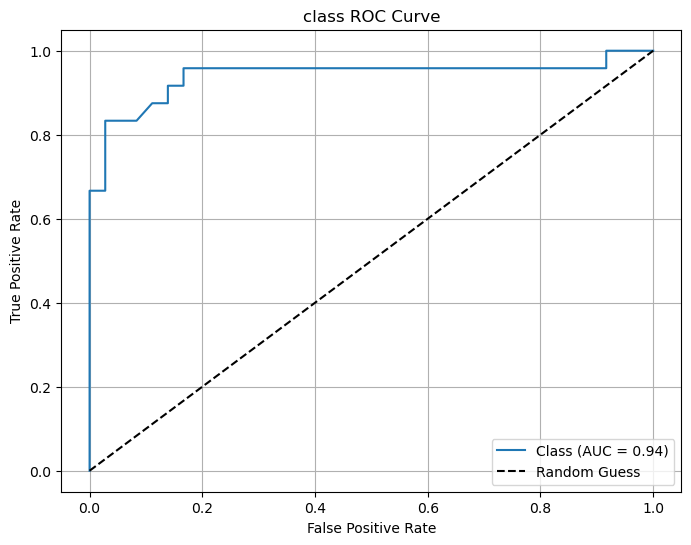

In [16]:

plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prop_SVC)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Class (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("class ROC Curve")
plt.legend()
plt.grid()
plt.show()